In [9]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam

import tensorflow as tf

import cv2
import os

import numpy as np

In [22]:
# Load data
labels = ['0','1','2','3','4','5','6','7','8','9']
img_size = 45

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir,label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            img_arr = cv2.imread(os.path.join(path, img))[...,::-1] # Convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size, if not already 45 x 45
            data.append([resized_arr, class_num])
    return np.array(data)

In [23]:
train = get_data('dataset/')

C:\Users\olive\anaconda3\envs\ProjectML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

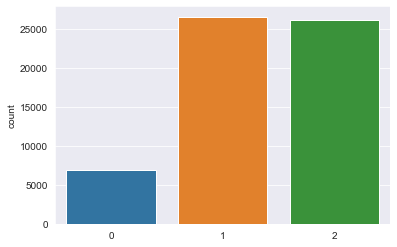

In [21]:
# Data visualisation
l = []
for i in train:
    if(i[1] == 0):
        l.append('0')
    elif(i[1] == 1):
        l.append('1')
    elif(i[1] == 2):
        l.append('2')

sns.set_style('darkgrid')
sns.countplot(l)
